# _______________  Capstone Project Phase - 4 ________________________

### Unsupervised ML (Clustering)

# 4.1  "Create 3 clusters as below.

1. Sensitive Area's

2. Moderate Area's

3. Peaceful Area's"

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
path=r'C:\Users\Administrator\Downloads\India_Crime -Zip\India_Crime - Copy\01_District_wise_crimes_committed_IPC_2001_2012.csv'
df=pd.read_csv(path)

In [4]:
df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   YEAR                                                 9017 non-null   int64 
 3   MURDER                                               9017 non-null   int64 
 4   ATTEMPT TO MURDER                                    9017 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   int64 
 6   RAPE                                                 9017 non-null   int64 
 7   CUSTODIAL RAPE                                       9017 non-null   int64 
 8   OTHER RAPE                                           9017 non-null   int64 
 9

In [6]:
#checking for null values
df.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

In [8]:
#checking for duplicated values
df.duplicated().sum()

0

There are no duplicate and null values are present in dataset.

In [9]:
#checking for value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('*'*125)

UTTAR PRADESH        878
MADHYA PRADESH       628
MAHARASHTRA          552
BIHAR                540
TAMIL NADU           469
RAJASTHAN            454
ODISHA               430
KARNATAKA            399
GUJARAT              384
ANDHRA PRADESH       370
ASSAM                362
JAMMU & KASHMIR      322
PUNJAB               314
JHARKHAND            312
WEST BENGAL          309
HARYANA              268
CHHATTISGARH         266
KERALA               233
ARUNACHAL PRADESH    195
DELHI UT             183
HIMACHAL PRADESH     176
UTTARAKHAND          168
NAGALAND             138
MANIPUR              125
MIZORAM              108
MEGHALAYA             96
TRIPURA               67
SIKKIM                60
A & N ISLANDS         36
DAMAN & DIU           36
GOA                   36
PUDUCHERRY            31
CHANDIGARH            24
D & N HAVELI          24
LAKSHADWEEP           24
Name: STATE/UT, dtype: int64
************************************************************************************************

By observing this we can understatd there is no presence of an unwanted data like '?' ,white space etc in the dataset

To preoceed with cluster formation we need data should be in numerical form.We will encode the categorical data.

### Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le=LabelEncoder()

In [15]:
for i in df.columns:
    df[i]=le.fit_transform(df[i])

In [16]:
df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,1,3,0,101,60,17,50,0,50,46,...,30,1057,16,149,34,175,0,181,1447,3208
1,1,28,0,151,125,1,23,0,23,53,...,69,1293,7,118,24,154,0,270,745,3190
2,1,154,0,101,57,2,27,0,27,59,...,38,1459,14,112,83,186,0,401,1221,3954
3,1,172,0,80,53,1,20,0,20,25,...,23,780,17,126,38,57,0,233,1148,2587
4,1,220,0,82,67,1,23,0,23,49,...,41,1137,12,109,58,247,0,423,2028,4104


In [6]:
x=df.drop(columns=['STATE/UT','DISTRICT'])

### Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
mm=MinMaxScaler()

In [7]:
X=mm.fit_transform(x)

In [8]:
from sklearn.cluster import KMeans

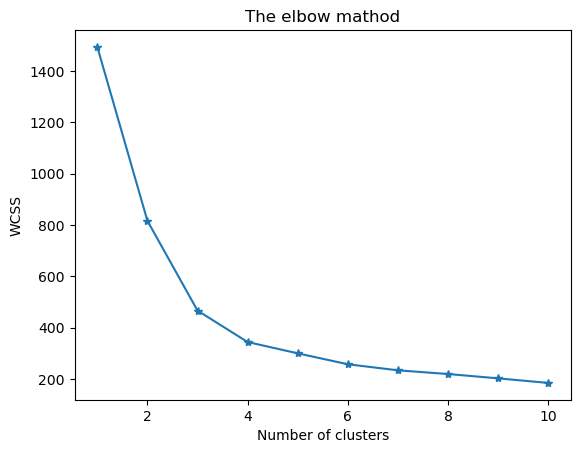

In [9]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss,marker='*')
plt.title('The elbow mathod')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
#fitting kmeans to the dataset
kmeans=KMeans(n_clusters=3,init='k-means++')
y_kmeans=kmeans.fit_predict(X)
print(y_kmeans)

[0 0 0 ... 1 1 1]


In [11]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [12]:
#cluster centers
kmeans.cluster_centers_

array([[2.28899877e-01, 7.96669625e-03, 6.24022070e-03, 3.98243276e-03,
        9.57951997e-03, 9.76290098e-04, 9.57809472e-03, 4.67039173e-03,
        3.62760154e-03, 5.28535165e-03, 7.74574937e-03, 3.51914243e-03,
        4.64478566e-03, 9.83036842e-03, 8.52354733e-03, 5.98429433e-03,
        8.87916426e-03, 9.37455149e-03, 5.62068052e-03, 4.37209789e-03,
        5.39214203e-03, 5.83022442e-03, 7.47663330e-03, 5.04712869e-03,
        8.38475776e-03, 3.47211114e-03, 4.64515068e-03, 1.82879356e-03,
        7.03226388e-03, 9.91780027e-03, 1.38055459e-02],
       [7.77016561e-01, 6.98449176e-03, 5.96765831e-03, 3.51592744e-03,
        1.06868457e-02, 5.67933595e-04, 1.06860166e-02, 6.73155874e-03,
        5.77723173e-03, 5.82155443e-03, 5.48176647e-03, 3.85540402e-03,
        5.07724600e-03, 8.88553525e-03, 9.62890843e-03, 9.84315407e-03,
        8.07834757e-03, 8.87768776e-03, 6.03576900e-03, 5.96475039e-03,
        6.48488707e-03, 5.14165922e-03, 7.58482526e-03, 5.41913183e-03,
       

In [14]:
#looking at the points which belongs to cluster 0
X[y_kmeans==0]

array([[0.00000000e+00, 1.32877253e-02, 7.53390256e-03, ...,
        1.12590197e-02, 1.22245845e-02, 1.88531100e-02],
       [0.00000000e+00, 1.98658071e-02, 1.56956303e-02, ...,
        1.67952227e-02, 6.07202680e-03, 1.87214923e-02],
       [0.00000000e+00, 1.32877253e-02, 7.15720743e-03, ...,
        2.51306295e-02, 1.01629945e-02, 2.64052466e-02],
       ...,
       [4.54545455e-01, 2.63123273e-04, 2.51130085e-04, ...,
        2.61259020e-03, 2.79442082e-03, 3.50375564e-03],
       [4.54545455e-01, 3.68372583e-03, 2.76243094e-03, ...,
        1.03881563e-02, 1.68631620e-02, 1.77683981e-02],
       [4.54545455e-01, 3.94684910e-03, 3.01356102e-03, ...,
        1.30007465e-02, 1.96575828e-02, 2.12721538e-02]])

In [15]:
#looking at the points which belongs to cluster 1
X[y_kmeans==1]

array([[5.45454545e-01, 1.47349033e-02, 7.65946760e-03, ...,
        1.92211993e-02, 1.73946656e-02, 2.58016203e-02],
       [5.45454545e-01, 1.96026839e-02, 1.06730286e-02, ...,
        2.47574023e-02, 1.52042263e-02, 2.35187328e-02],
       [5.45454545e-01, 1.69714511e-02, 9.04068307e-03, ...,
        3.85668077e-02, 2.01246618e-02, 3.22009667e-02],
       ...,
       [1.00000000e+00, 6.57808183e-04, 7.53390256e-04, ...,
        2.73699925e-03, 3.15680969e-03, 3.57183380e-03],
       [1.00000000e+00, 3.15747928e-03, 2.63686590e-03, ...,
        1.36227917e-02, 1.34325474e-02, 1.58576713e-02],
       [1.00000000e+00, 3.81528746e-03, 3.39025615e-03, ...,
        1.63597910e-02, 1.65893570e-02, 1.94295051e-02]])

In [16]:
#looking at the points which belongs to cluster 2
X[y_kmeans==2]

array([[0.        , 0.34232338, 0.19525364, ..., 0.46031351, 0.27657518,
        0.5904146 ],
       [0.        , 0.47927904, 0.42930688, ..., 0.1496641 , 0.2952825 ,
        0.40135249],
       [0.        , 0.16129457, 0.06742843, ..., 0.18188604, 0.40844447,
        0.46937164],
       ...,
       [1.        , 0.25641363, 0.37091914, ..., 0.96410799, 1.        ,
        0.90985999],
       [1.        , 0.65333509, 0.60409342, ..., 0.89611844, 0.5519424 ,
        0.89905371],
       [1.        , 0.29627681, 0.35836263, ..., 0.27276686, 0.51927909,
        0.73264347]])

# 4.2  Create DataFrame for each cluster that shows data according to the areas.



In [30]:
Peacefull_area=df[y_kmeans==1]
moderate_area=df[y_kmeans==0]
sensitive_area=df[y_kmeans==2]

### Peacefull_area

In [35]:
Peacefull_area.head(40)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
4365,ANDHRA PRADESH,ADILABAD,2007,112,61,12,46,0,46,83,...,17,1244,21,156,133,335,0,309,2160,5685
4366,ANDHRA PRADESH,ANANTAPUR,2007,149,85,3,31,0,31,87,...,8,1073,14,176,194,0,0,398,1888,5182
4367,ANDHRA PRADESH,CHITTOOR,2007,129,72,2,31,0,31,102,...,48,1101,25,118,197,395,0,620,2499,7095
4368,ANDHRA PRADESH,CUDDAPAH,2007,96,47,3,32,0,32,76,...,29,982,8,139,94,242,0,467,2350,5500
4369,ANDHRA PRADESH,CYBERABAD,2007,186,84,8,45,0,45,147,...,74,3641,41,118,55,881,0,1188,2172,14236
4370,ANDHRA PRADESH,EAST GODAVARI,2007,99,114,2,30,0,30,84,...,52,2538,19,159,131,561,0,692,1850,8580
4371,ANDHRA PRADESH,GUNTAKAL RLY.,2007,3,0,0,0,0,0,2,...,0,8,0,0,4,3,0,2,25,175
4372,ANDHRA PRADESH,GUNTUR,2007,157,190,1,43,0,43,93,...,77,1567,28,292,214,569,0,612,2918,8659
4373,ANDHRA PRADESH,HYDERABAD CITY,2007,121,147,9,58,0,58,148,...,37,4352,41,216,128,1365,0,502,2624,17391
4374,ANDHRA PRADESH,KARIMNAGAR,2007,123,95,5,73,0,73,152,...,55,2971,61,315,278,687,0,483,1472,8535


### moderate_area

In [38]:
moderate_area.head(50)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,3,1,0,0,0,0,0,...,0,1,0,1,0,0,0,4,104,287
6,ANDHRA PRADESH,GUNTUR,2001,182,88,2,54,0,54,82,...,43,1792,7,139,129,378,0,369,2426,7848
7,ANDHRA PRADESH,HYDERABAD CITY,2001,111,113,7,37,0,37,80,...,0,3137,24,118,27,746,0,409,1512,11831
8,ANDHRA PRADESH,KARIMNAGAR,2001,162,85,6,56,0,56,67,...,33,1392,62,414,81,224,0,322,1726,5811
9,ANDHRA PRADESH,KHAMMAM,2001,93,60,1,47,0,47,41,...,73,1026,17,180,336,172,0,209,1450,4582


In [39]:
moderate_area.tail(50)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
4314,WEST BENGAL,ASANSOL,2006,42,16,18,19,0,19,16,...,3,47,13,11,0,158,0,87,977,1699
4315,WEST BENGAL,BANKURA,2006,55,38,5,51,0,51,26,...,5,294,24,43,0,133,0,130,121,1282
4316,WEST BENGAL,BIRBHUM,2006,72,10,13,57,0,57,39,...,5,146,18,34,2,175,0,153,375,1625
4317,WEST BENGAL,BURDWAN,2006,90,13,25,64,0,64,41,...,13,158,27,91,0,519,0,334,1458,3897
4318,WEST BENGAL,COOCHBEHAR,2006,31,8,5,124,0,124,48,...,0,78,5,116,0,309,0,88,630,1697
4319,WEST BENGAL,DAKSHIN DINAJPUR,2006,26,41,16,32,0,32,49,...,4,59,11,60,0,140,0,77,407,1101
4320,WEST BENGAL,DARJEELING,2006,52,2,10,30,0,30,43,...,0,239,1,44,0,79,0,81,544,1682
4321,WEST BENGAL,HOOGHLY,2006,81,56,18,43,0,43,28,...,11,269,8,37,0,467,0,270,930,3220
4322,WEST BENGAL,HOWRAH,2006,53,5,14,60,0,60,66,...,2,481,26,75,6,368,0,288,1152,3633
4323,WEST BENGAL,HOWRAH G.R.P.,2006,9,3,3,0,0,0,3,...,0,2,2,5,0,0,0,1,53,826


### sensitive_area

In [41]:
sensitive_area.head(40)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
28,ANDHRA PRADESH,TOTAL,2001,2602,1555,136,871,0,871,1182,...,872,34947,420,3544,2271,5791,7,7400,34344,130089
115,BIHAR,TOTAL,2001,3643,3419,250,888,0,888,2159,...,502,7544,859,562,21,1558,83,2406,36667,88432
169,GUJARAT,TOTAL,2001,1226,537,94,286,0,286,998,...,449,13760,67,756,111,3667,0,2924,50719,103419
285,KARNATAKA,TOTAL,2001,1626,1475,74,293,0,293,559,...,352,23285,220,1665,81,1755,0,100,47301,109098
302,KERALA,TOTAL,2001,472,615,111,562,0,562,183,...,768,19829,27,1942,81,2561,0,0,54544,103847
351,MADHYA PRADESH,TOTAL,2001,2425,2870,125,2851,0,2851,956,...,1014,30895,609,7063,751,2562,0,3297,85143,181741
397,MAHARASHTRA,TOTAL,2001,2839,1454,101,1302,0,1302,985,...,1208,30212,308,2823,1120,6090,1,8993,42963,171233
529,RAJASTHAN,TOTAL,2001,1259,1923,63,1049,0,1049,2718,...,1092,27485,376,2878,56,5532,1,4221,62347,155185
573,TAMIL NADU,TOTAL,2001,1662,2204,19,423,0,423,952,...,980,28429,191,1773,1012,815,14,8550,76468,154801
650,UTTAR PRADESH,TOTAL,2001,7601,7964,1186,1958,0,1958,4330,...,812,17816,2211,2870,2575,7365,0,7129,57839,178129


In [42]:
sensitive_area.tail(40)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
6563,UTTAR PRADESH,TOTAL,2009,4534,4141,1439,1759,0,1759,6083,...,254,10934,2232,2782,2524,8566,0,12159,60918,172884
6602,WEST BENGAL,TOTAL,2009,2068,2119,931,2336,0,2336,2750,...,344,11196,506,1942,108,16112,5,3623,38776,113036
6669,ANDHRA PRADESH,TOTAL,2010,2538,1953,155,1362,0,1362,2053,...,925,46777,588,4634,4562,12080,0,14085,41373,181438
6718,ASSAM,TOTAL,2010,1223,431,46,1721,5,1716,3250,...,437,5744,175,1400,20,5410,0,2847,22110,61668
6763,BIHAR,TOTAL,2010,3362,2915,344,795,0,795,3674,...,660,15328,1257,534,16,2271,8,5615,56508,127453
6821,GUJARAT,TOTAL,2010,1048,462,44,408,0,408,1447,...,260,10131,19,668,110,5600,0,5907,63788,116439
6952,KARNATAKA,TOTAL,2010,1805,1850,94,586,0,586,1374,...,286,21835,248,2544,83,3441,0,471,65123,142322
6971,KERALA,TOTAL,2010,363,361,86,634,0,634,261,...,374,18532,22,2936,537,4797,0,47,98668,148313
7025,MADHYA PRADESH,TOTAL,2010,2423,2277,123,3135,0,3135,1187,...,748,39193,892,6646,918,3756,5,7038,107390,214269
7071,MAHARASHTRA,TOTAL,2010,2744,1926,152,1599,0,1599,1508,...,1229,29696,393,3661,1180,7434,0,13508,49739,208168


# 4.3  "Analyze your clusters and prepare a report that explains all your observations.



Example - 

1. What is impacting more crimes in sensitive areas. 

2. What needs to be done to reduce crime. 

3. Most safe and unsafe districts.

4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"

### Based on the dataset and analysis we can observe that:

* Peaceful Area:
States Identified: Puducherry, Arunachal Pradesh.These states/UTs exhibit notably lower crime rates across major categories such as murder, rape, and kidnapping.                                                                                           
Recommendations: Maintain current crime prevention strategies with a focus on community policing and enhancing social programs to sustain peaceful environments.

* Moderate Area:
States Identified: West Bengal, Delhi, Assam. Moderate levels of crime, particularly in crimes like murder and rape, placing them between peaceful and sensitive areas.                                                                                     
Recommendations: Implement targeted interventions to address specific crime hotspots, enhance law enforcement effectiveness, and improve public safety awareness.


* Sensitive Area:
States Identified: Uttar Pradesh, Rajasthan, Maharashtra, Bihar, West Bengal, Karnataka, Madhya Pradesh, Tamil Nadu High incidences of serious crimes such as murder, rape, dowry deaths, kidnapping, and domestic violence.                             
Recommendations: Prioritize comprehensive crime reduction strategies, strengthen law enforcement capabilities, and invest in social programs addressing socio-economic factors contributing to crime.
* Lakshdweep state and damu &diu is comparitevely safe states.
* Andra pradeh ,maharastra,bihar and assam unsafe states.

# 4.4   Capstone project overall story in your own words. Min 1000 words.



## Introduction

In todays ,Data is very crucial for making informed decisions.The capstone project focuses on various crime ,crime type ,population,literacy rate etc.by analysing this data we can find out patterns ,causes which can be used to improve public safety. 

Initially we begin project by looking at the data.The dataset contains information about crimes like murder,rape,kidnapping,hurt etc on year,state,district.This will help us to understand where and whe most crime are occured.

### Data Preparation

Before going on next step like preparing cluster we preprocess the data like here i have checked for null values,duplicate values,encode the categorical data into numerical data,and normalizing the data.

### Analysis and Observations:

Based on total crimes and other crimes dataset is devided into three areas , Peaceful area,moderate area,sensitive area.

#### Peaceful Area:


Peaceful area,shows significantly less crimes compared to other two area sensitive are and moderate area.Paundecherry,ArunachalPradesh states exibit notabley lower crime rates across major categories. The data indicates that these regions have managed to maintain a peaceful environment with fewer incidences of serious crimes such as murder, rape, and kidnapping.                                                                                                                    
Several factors like higher literacy rate,Economic stability,Effective law inforcement,and community engagement are the reason for occurance of less crimes as compare to other area's.

#### Moderate area :

Moderate area is the mixture of both peacefull area and sensitive area.West Bengal, Delhi, Assam.
These states exhibit moderate levels of crime, particularly in serious crimes such as murder and rape.                                                                                                                                                        
To reduce crime score and create a peacefull environment governament should enforce more strong law's,should raise in the literacy rate and can conduct campeighn to raise awarness among the people.

#### Sensitive area :


Sensitive areas, on the other hand, exhibit higher crime rates due to a combination of socio-economic challenges and governance issues such as unemployment,low literacy rate,economic instability,week law enforcement.                                       
Uttar Pradesh, Rajasthan, Maharashtra, Bihar, West Bengal, Karnataka, Madhya Pradesh, Tamil Nadu.
These states have high incidences of serious crimes such as murder, rape, dowry deaths, kidnapping, and domestic violence.     
Here also goverment should educate the people and should enforce more strong laws.

Additional Observations:

* Lakshadweep and Daman & Diu: These states/UTs are comparatively safe, with significantly lower crime rates. Efforts should be made to maintain this status by continuing effective crime prevention strategies and focusing on community well-being.
* Unsafe States: Andhra Pradesh, Maharashtra, Bihar, and Assam are identified as unsafe states with high crime rates. These states require immediate and intensive interventions to address the prevailing crime issues.

## Conclusion :

The analysis shows the signification varience of crimes from year to year,across varies states.Peacefull are like Paundicherry,Arunachal Pradesh successfully maintained the less crime score it should continue with the same strategies,Moderate areas such as West Bengal, Delhi, and Assam need targeted interventions and improved law enforcement to reduce crime rates. Sensitive areas, including Uttar Pradesh, Rajasthan, and Maharashtra, require comprehensive strategies to address the socio-economic factors contributing to high crime rates.                                                         

By Focusing on all theese strategies for each area the government can provide a peacefull environment in all areas and can effectively reduce the crime score of india.